# Predicting using Decision Tree Classifier

## Name - Srikanth Gembali

In [1]:
# Importing required libraries
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Loading Data

In [2]:
data = pd.read_csv(r'C:\Users\admin\Downloads\iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2-D Scatter plot

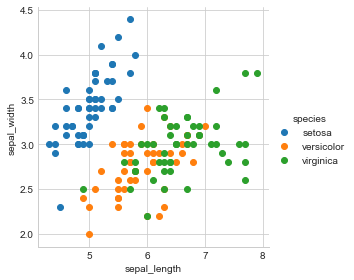

In [3]:
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="species", size=4) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();
plt.show();

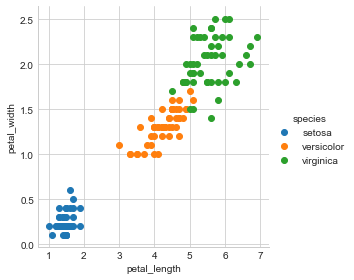

In [4]:
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="species", size=4) \
   .map(plt.scatter, "petal_length", "petal_width") \
   .add_legend();
plt.show();

In [5]:
y = data['species'].values
X = data.drop(['species'], axis=1) #dropping the class species
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Splitting Data into Train and Test : Stratified Sampling

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [7]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(100, 4) (100,)
(50, 4) (50,)


## Hyperparameter tuning

In [8]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(class_weight='balanced')
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Prediction

In [9]:
y_pred = DT.predict(X_test)

## Confusion Matrix

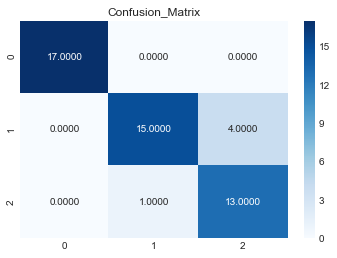

In [10]:
sns.heatmap(confusion_matrix(y_pred, y_test),annot=True,fmt= '.4f',cmap = 'Blues')
plt.title('Confusion_Matrix')
plt.show()

In [11]:
fn = ['sepal length', 'sepal width', 'petal length', 'petal width']
cn = ['setosa', 'versicolor', 'virginica']

In [12]:
from sklearn import tree
tree.export_graphviz(DT,
                     out_file="tree.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)

In [13]:
import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

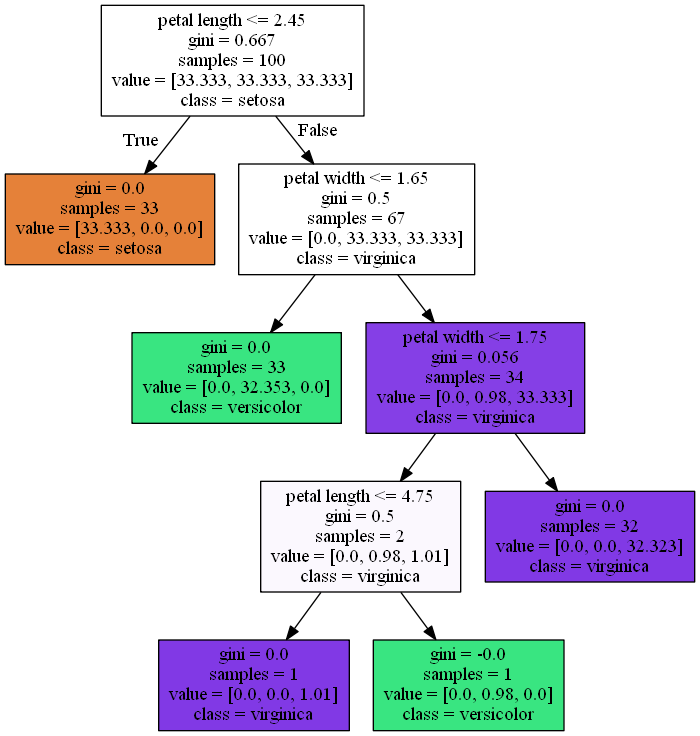

In [14]:
from IPython.display import Image
Image(filename = 'tree.png')